<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [10]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [57]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [58]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
describe = df.describe()
describe.loc['NaN'] = df.isna().sum()
describe.loc['%NaN'] = (df.isna().mean())*100
describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
NaN,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%NaN,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [59]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.shape

(891, 12)

In [79]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_clean = df.copy()
df_clean = df_clean[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [81]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df_clean = df_clean.dropna()
df_clean.reset_index(inplace=True)
df_clean = df_clean[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

     Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3    male  22.0      1      0
1           1       1  female  38.0      1      0
2           1       3  female  26.0      0      0
3           1       1  female  35.0      1      0
4           0       3    male  35.0      0      0
..        ...     ...     ...   ...    ...    ...
709         0       3  female  39.0      0      5
710         0       2    male  27.0      0      0
711         1       1  female  19.0      0      0
712         1       1    male  26.0      0      0
713         0       3    male  32.0      0      0

[714 rows x 6 columns]


In [77]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df_clean.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [82]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,1,male,54.0,0,0
6,0,3,male,2.0,3,1
7,1,3,female,27.0,0,2
8,1,2,female,14.0,1,0
9,1,3,female,4.0,1,1


In [84]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
df_clean['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

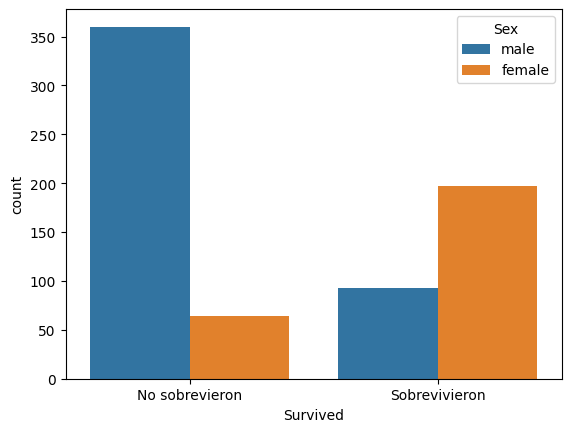

In [99]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
ax = sns.countplot(data=df_clean, x=df_clean['Survived'].replace({0:'No sobrevieron', 1: 'Sobrevivieron'}), hue='Sex')

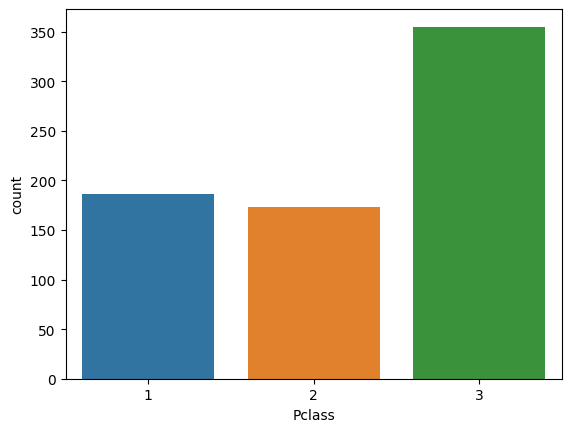

In [105]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
ax = sns.countplot(x=df_clean['Pclass'])

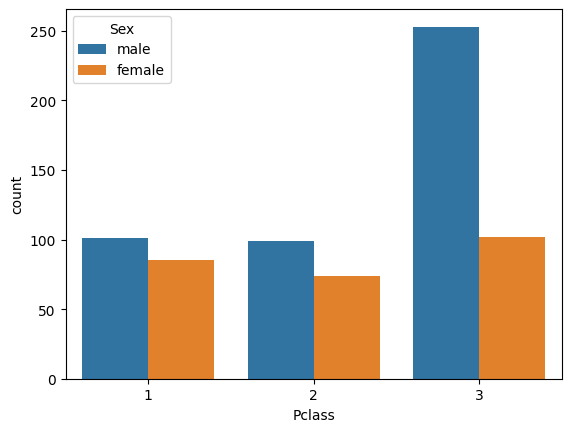

In [107]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
ax = sns.countplot(data=df_clean, x=df_clean['Pclass'], hue='Sex')

#### Transformar variables categóricas texto a clases numeradas

In [109]:
from sklearn.preprocessing import LabelEncoder

In [118]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando

df_cod = df_clean.copy()

In [119]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
le = LabelEncoder()
label_encoder = le.fit_transform(df_cod['Sex'])
df_cod['Sex'] = label_encoder
df_cod


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
709,0,3,0,39.0,0,5
710,0,2,1,27.0,0,0
711,1,1,0,19.0,0,0
712,1,1,1,26.0,0,0


In [120]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
le.classes_

array(['female', 'male'], dtype=object)

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [144]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived

X = df_cod.drop(columns='Survived').values
print(X)
y = df_cod['Survived'].values

[[ 3.  1. 22.  1.  0.]
 [ 1.  0. 38.  1.  0.]
 [ 3.  0. 26.  0.  0.]
 ...
 [ 1.  0. 19.  0.  0.]
 [ 1.  1. 26.  0.  0.]
 [ 3.  1. 32.  0.  0.]]


Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [138]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [139]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=5)

clf = clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [140]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.806

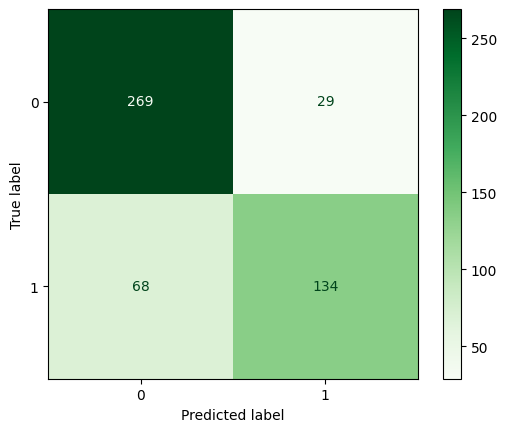

In [143]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Greens)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [157]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

clase = 3
sexo = 'female'
edad = 14
heramnos = 1
hijos = 2

sexo_encoded = int(le.transform([sexo]))
X = np.array([[clase, sexo_encoded, edad, heramnos, hijos]])
y = clf.predict(X)
if y == 1:
    print('Sobreviviste')
else:
    print('No sobreviviste')

Sobreviviste
